# Topic Modeling with BERTopic
BERTopic is a topic modeling tool which creates topic clusters based on word embeddings and a class-based TF-IDF. It generates a set of topics, the top words in each topic, and the likelihood of each text in a corpus belonging to each topic. Visualizations can also be generated based on the relationships between topics.  


This notebook uses BERTopic for unsupervised topic modeling in order to explore the sci-fi corpus. BERTopic can be customized to support the following types of topic modeling:
* Guided: seeded topics manually set by the researcher
* (Semi)-supervised: modeling guided by document labels
* Hierarchicial: topic similarity and rankings calculated, subtopics generated
* Dynamic: differentiates topic clustering based on doc timestamps
* Online: modeling updated incrementally from small batches of texts 

Adapted from:

https://github.com/MaartenGr/BERTopic/blob/master/notebooks/BERTopic.ipynb

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=y_eHBI1jSb6i

## Install Packages

In [1]:
#!pip install bertopic
#!pip install --upgrade bertopic
#!conda install pandas
#!conda install nltk
import os
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dssadmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get and Clean Data

In [154]:
#Get current working directory 
path = os.getcwd()
print(path)

#Change working directory
path = os.chdir("/home/dssadmin/Desktop/SF_Analysis/Data")

#Upload dataframe√
df = pd.read_csv('chapter_chunks_bow_output.csv')

#Drop first column (unnamed)
df = df.iloc[: , 1:]

df

/home/dssadmin/Desktop/SF_Analysis/Data


Book + Chunk  \
0     1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
1     1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
2     1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
3     1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
4     1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
...                                                 ...   
9953  2000_DEBRANT_VIRALINTELLIGENCE _Chapter_16 Chu...   
9954  2000_DEBRANT_VIRALINTELLIGENCE _Chapter_16 Chu...   
9955  2000_DEBRANT_VIRALINTELLIGENCE _Chapter_16 Chu...   
9956  2000_DEBRANT_VIRALINTELLIGENCE _Chapter_16 Chu...   
9957  2000_DEBRANT_VIRALINTELLIGENCE _Chapter_16 Chu...   

                                                   Text  
0     1 a a a a a a a a a a a a a a a a a a a a a a ...  
1     a a a a a a a a a a a a a a a a a a a a a a a ...  
2     a a a a a a a a a a a a a a a a a a a a a a a ...  
3     a a a a a a a a a a a a a a a a a able able ab...  
4     2 a a a a a a a a a a a a a a a a a a a a a a ...  
...                                                 ...  
9953  16 a a a a a a a a a a a a a a a a a a a a a a...  
9954  a a a a a a a a a a a a a a a a a a abilities ...  
9955  1 a a a a a a a a a a a a a a a a a a a a a a ...  
9956  a a a a a a a a a a a a a a a a a a a a a a ab...  
9957  a a a a a a a a a a a a a a a a a a a a a a a ...  

[9958 rows x 2 columns]

In [3]:
#Lowercasing, punctuation and stopword removal
#Lowercase all words
df['Text'] = df['Text'].str.lower()

#Remove punctuation and replace with no space (except periods and hyphens)
df['Text'] = df['Text'].str.replace(r'[^\w\-\.\'\s]+', '', regex = True)

#Remove periods and replace with space (to prevent incorrect compounds)
df['Text'] = df['Text'].str.replace(r'[^\w\-\'\s]+', ' ', regex = True)

#Remove stopwords
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#Check output
df.head()


Book + Chunk  \
0  1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
1  1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
2  1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
3  1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   
4  1908_HODGSON_THEHOUSEONTHEBORDERLAND _Chapter_...   

                                                Text  
0  1 abounds accomplish accounted across add addr...  
1  abrupt absences across afterwards againanyhow ...  
2  able abyss abyss abyss abyss abyss across actu...  
3  able able access advice air alone also among a...  
4  2 ability able account accustomed acute age ag...

In [4]:
#Append data to list
text = df.Text.to_list()
text

['1 abounds accomplish accounted across add addressed addressing aid alone among among angler another answer answering anything appetites ardrahan ardrahan around arrived asked asked assent average aware away away awhile back bacon bad bare base began belongings beneath betrayed blankets bleak blessings brought busy called calling camp cars cast casually chance chance clinging close closed colony come come come comer coming comprehend comrade consulted contact cottages cottageunthatched could could country country country course covering crowd crowd curiously cutting day desolate desolation died direction discovered dismissed distant distributed doorway driver driver driver early earth either elbow elected end english entirely erected escaped even evening ever evident exist expression eyed face faced faces fact fact family far fell fellow fellow fellows filled finding fine fishing flap following food fortnight forty fowls friend friend friendly frying-pan fuel full gaunt get getting gl

## Alternative Cleaning: English Language Dictionary Words Only

In [269]:
#Check if word is in words corpus
"Mercury" in words.words()

True

In [275]:
#Only keep words in nltk words corpus
from nltk.corpus import words
nltk.download('words')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
words_list = words.words()

#Make copy of dataset
df2 = df.copy()


[nltk_data] Downloading package words to /home/dssadmin/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dssadmin/nltk_data...


In [280]:
#Words corpus does not contain plural forms, must lemmatize first
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()

df2['Text'] = df2['Text'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split() ]))

[nltk_data] Downloading package omw-1.4 to /home/dssadmin/nltk_data...


In [ ]:
#Keep only words in words corpus
df2['Text'] = df2['Text'].apply(lambda x: ' '.join([word for word in x.split() if word in (words_list)]))

In [ ]:
#Append data to list
text2 = df2.Text.to_list()
text2

## Create and Run BERTopic Model

The model (`topic_model`) can be defined based on multiple parameters, including: 
* language: language of word embedding model used (default=English)
* embedding-model: sentence-transformers model which is used to create word embeddings; defaults to pre-set model, and [here's a list of all available models](https://www.sbert.net/docs/pretrained_models.html)
* nr_topics: set to reduce number of topics; can specify a  specific # of topics OR set as "auto" to merge topics with similarity > 0.9
* calculate_probabilities: calculates likelihood of each document falling into any of the possible documents (set to True or False)
* verbose: set to True so model initiation process does not shows messages

Once the model is defined, fit it to the corpus prepared above using `fit_transform` and get topics and probabilities. 

In [5]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", nr_topics = 'auto', calculate_probabilities=True, verbose=True, top_n_words=20)
topics, probs = topic_model.fit_transform(text)

/home/dssadmin/anaconda3/envs/bertopic/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-01-17 09:18:12.514027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 09:18:12.607064: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 09:18:12.607082: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a 

In [202]:
#Get the 10 most frequent topics (-1 topic refers to all outliers, ignore it)
freq = topic_model.get_topic_info(); freq.head(10)

Topic  Count                            Name
0     -1   5705         -1_said_one_would_could
1      0   1391          0_said_back_like_could
2      1     89        1_aton_liam_strat_haight
3      2     86  2_sergeant_colonel_sir_general
4      3     85  3_soul_souls_flesh_poundgrayly
5      4     71      4_obrien_captain_dust_base
6      5     67              5_matt_sam_mice_dr
7      6     67         6_akeley_stone_old_ammi
8      7     62      7_gordon_cooper_1963_lakin
9      8     59     8_cramer_gains_brannon_gove

In [203]:
#Investigate top n words in a specific topic
topic_model.get_topic(1)  

[('aton', 0.03234260374396717),
 ('liam', 0.022954939538444342),
 ('strat', 0.014397146624453086),
 ('haight', 0.013924144514391263),
 ('fleet', 0.01181593391387659),
 ('terran', 0.010913754759546519),
 ('ships', 0.010855454634771554),
 ('commander', 0.010604006422328489),
 ('ship', 0.009667019659814684),
 ('time', 0.008800831701181426),
 ('space', 0.00869876351295558),
 ('hub', 0.007322835711078217),
 ('captain', 0.007306919780633293),
 ('would', 0.007286483584373851),
 ('liams', 0.007189825004224981),
 ('empire', 0.0069534922031349025),
 ('officer', 0.006920497860240964),
 ('paraion', 0.00684813979448999),
 ('quelle', 0.006641687561804939),
 ('syman', 0.00633219034942935)]

In [205]:
#Get predicted topics for the first 10 documents in corpus
topic_model.topics_[:10]

[-1, -1, -1, -1, -1, 60, 60, 60, 0, 0]

In [206]:
#Create a dataframe which has info about top topic in each document
topics_df = topic_model.get_document_info(text)
topics_df

Document  Topic  \
0     1 abounds accomplish accounted across add addr...     -1   
1     abrupt absences across afterwards againanyhow ...     -1   
2     able abyss abyss abyss abyss abyss across actu...     -1   
3     able able access advice air alone also among a...     -1   
4     2 ability able account accustomed acute age ag...     -1   
...                                                 ...    ...   
9953  16 abilities able able across actual actually ...     -1   
9954  abilities abruptly abruptly access access acen...     -1   
9955  1 abilities acres air air along along already ...     -1   
9956  able able accessed accomplish activate actuall...      0   
9957  accusing adapt add adjustment advantage affect...     -1   

                         Name  \
0     -1_said_one_would_could   
1     -1_said_one_would_could   
2     -1_said_one_would_could   
3     -1_said_one_would_could   
4     -1_said_one_would_could   
...                       ...   
9953  -1_said_one_would_could   
9954  -1_said_one_would_could   
9955  -1_said_one_would_could   
9956   0_said_back_like_could   
9957  -1_said_one_would_could   

                                            Top_n_words  Probability  \
0     said - one - would - could - like - time - bac...     0.878648   
1     said - one - would - could - like - time - bac...     0.703682   
2     said - one - would - could - like - time - bac...     0.583499   
3     said - one - would - could - like - time - bac...     0.016926   
4     said - one - would - could - like - time - bac...     0.941291   
...                                                 ...          ...   
9953  said - one - would - could - like - time - bac...     0.802524   
9954  said - one - would - could - like - time - bac...     0.850410   
9955  said - one - would - could - like - time - bac...     0.699300   
9956  said - back - like - could - one - would - kno...     0.222796   
9957  said - one - would - could - like - time - bac...     0.803006   

      Representative_document  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
9953                    False  
9954                    False  
9955                    False  
9956                    False  
9957                    False  

[9958 rows x 6 columns]

In [21]:
#Download CSV with document and topic information
topics_df.to_csv('topics_df.csv', index=False)

In [207]:
#Add document names to dataframe

#Create dataframe with texts and titles
texts_df = df.copy()
texts_df.rename(columns={'Book + Chunk':'Title','Text':'Document'}, inplace=True)
texts_df

#Merge with above dataset on Document
top_BERTopic_per_doc = pd.DataFrame()
top_BERTopic_per_doc = texts_df.merge(topics_df, how='right',on='Document')
top_BERTopic_per_doc

#Sort by topic (or title)
top_BERTopic_per_doc.sort_values(by=['Topic'], inplace=True)
top_BERTopic_per_doc

Title                                           Document  Topic  \
0      NaN  1 abounds accomplish accounted across add addr...     -1   
5631   NaN  able ached acid across air alive along already...     -1   
5630   NaN  able able able afraid afraid alerted alone alr...     -1   
5629   NaN  205 adjust ahead air along along also always a...     -1   
5628   NaN  -would 1969 1970s 22 23 24 6 70s activities ad...     -1   
...    ...                                                ...    ...   
2988   NaN  able able account accumulate act acted acted a...     91   
5793   NaN  abandoned addwe adjust admitted adopted ago al...     91   
9462   NaN  absolutely absurd abundance abundant accounts ...     91   
978    NaN  able abundance achieved across adapted adjutan...     91   
7272   NaN  a-hunting across across addition adequate adop...     91   

                         Name  \
0     -1_said_one_would_could   
5631  -1_said_one_would_could   
5630  -1_said_one_would_could   
5629  -1_said_one_would_could   
5628  -1_said_one_would_could   
...                       ...   
2988     91_ham_tang_pat_naxa   
5793     91_ham_tang_pat_naxa   
9462     91_ham_tang_pat_naxa   
978      91_ham_tang_pat_naxa   
7272     91_ham_tang_pat_naxa   

                                            Top_n_words  Probability  \
0     said - one - would - could - like - time - bac...     0.878648   
5631  said - one - would - could - like - time - bac...     0.806090   
5630  said - one - would - could - like - time - bac...     0.720781   
5629  said - one - would - could - like - time - bac...     0.698656   
5628  said - one - would - could - like - time - bac...     0.403056   
...                                                 ...          ...   
2988  ham - tang - pat - naxa - lang - steiner - gor...     1.000000   
5793  ham - tang - pat - naxa - lang - steiner - gor...     1.000000   
9462  ham - tang - pat - naxa - lang - steiner - gor...     1.000000   
978   ham - tang - pat - naxa - lang - steiner - gor...     1.000000   
7272  ham - tang - pat - naxa - lang - steiner - gor...     1.000000   

      Representative_document  
0                       False  
5631                    False  
5630                    False  
5629                    False  
5628                    False  
...                       ...  
2988                     True  
5793                    False  
9462                    False  
978                     False  
7272                     True  

[9958 rows x 7 columns]

In [12]:
#Download CSV with document and topic information
top_BERTopic_per_doc.to_csv('BERTopic_document_info.csv', index=False)

In [181]:
#Make CSV with just topic information 
BERTopic_topic_metadata_bow_df = top_BERTopic_per_doc[['Topic','Name','Top_n_words']].copy()
BERTopic_topic_metadata_bow_df = BERTopic_topic_metadata_bow_df.drop_duplicates()
BERTopic_topic_metadata_bow_df = BERTopic_topic_metadata_bow_df.reset_index(drop=True)

#Download as CSV
BERTopic_topic_metadata_bow_df.to_csv('BERTopic_topic_list.csv', index=False)

In [182]:
#Remove chapter and chunk labels from titles 
#Remove document, probability and representative document first (will mess up duplicates) and name (redundant)
top_BERTopic_per_doc.drop(columns=['Document','Probability', 'Name','Representative_document'], inplace=True)

#Split title on chapter heading and remove following text
test = top_BERTopic_per_doc['Title'].str.split("_Chapter", expand = True)

top_BERTopic_per_doc['Title'] = test[0]
top_BERTopic_per_doc

Title  Topic  \
345     1953_SOHL_COSTIGANSNEEDLE      44   
912   1957_BLISH_THESEEDLINGSTARS      44   
982   1957_BLISH_THESEEDLINGSTARS      44   
1060  1957_FARMER_THEGREENODYSSEY      44   
1243         1958_ALDISS_STARSHIP      44   
...                            ...    ...   
9953                           NaN     -1   
9954                           NaN     -1   
9955                           NaN     -1   
9956                           NaN      0   
9957                           NaN     -1   

                                            Top_n_words  
345   part - cogito - descartes - nightwings - ergo ...  
912   part - cogito - descartes - nightwings - ergo ...  
982   part - cogito - descartes - nightwings - ergo ...  
1060  part - cogito - descartes - nightwings - ergo ...  
1243  part - cogito - descartes - nightwings - ergo ...  
...                                                 ...  
9953  said - one - would - could - like - time - bac...  
9954  said - one - would - could - like - time - bac...  
9955  said - one - would - could - like - time - bac...  
9956  said - back - like - could - one - would - kno...  
9957  said - one - would - could - like - time - bac...  

[9958 rows x 3 columns]

In [183]:
#Remove rows per book that contain duplicate topics
top_BERTopic_per_doc = top_BERTopic_per_doc.drop_duplicates()
top_BERTopic_per_doc

Title  Topic  \
345      1953_SOHL_COSTIGANSNEEDLE      44   
912    1957_BLISH_THESEEDLINGSTARS      44   
1060   1957_FARMER_THEGREENODYSSEY      44   
1243          1958_ALDISS_STARSHIP      44   
2162  1961_ANDERSON_ORBITUNLIMITED      44   
...                             ...    ...   
6887                            NaN     69   
7092                            NaN     79   
7808                            NaN     38   
8144                            NaN     67   
9487                            NaN     24   

                                            Top_n_words  
345   part - cogito - descartes - nightwings - ergo ...  
912   part - cogito - descartes - nightwings - ergo ...  
1060  part - cogito - descartes - nightwings - ergo ...  
1243  part - cogito - descartes - nightwings - ergo ...  
2162  part - cogito - descartes - nightwings - ergo ...  
...                                                 ...  
6887  kieron - alyx - seigneur - mistress - hobart -...  
7092  kieron - aylwin - balloon - alyx - mistress - ...  
7808  corcail - sendijen - jaeger - aensa - aensalor...  
8144  dio - esther - rourke - kali - lilith - hallor...  
9487  destin - tolliver - linda - cara - abbott - la...  

[107 rows x 3 columns]

In [54]:
#Download CSV with titles, topics and top words
top_BERTopic_per_doc.to_csv('title_topic_topwords_bow.csv', index=False)

In [209]:
#Add topic names (determined manually) to a new dataframe
topic_names = pd.read_csv('/home/dssadmin/Desktop/SF_Analysis/Data/BERTopic_topic_list - BERTopic_topic_list.csv')
topic_names = topic_names.drop(columns='Top_n_words')
topic_names.head()

Topic                     Name
0     -1                 Outliers
1      0  General_Auxiliary_Words
2     60           Sky_Star_Water
3      3                   Bodies
4     44         Thoughts_Waiting

In [185]:
#Add topic name to dataframe 
named_topics_per_doc = top_BERTopic_per_doc.copy()

named_topics_per_doc['Topic'] = top_BERTopic_per_doc.Topic.map(topic_names.set_index('Topic')['Name'])
named_topics_per_doc

Title                    Topic  \
345      1953_SOHL_COSTIGANSNEEDLE          Thoughts_Waiting   
912    1957_BLISH_THESEEDLINGSTARS          Thoughts_Waiting   
1060   1957_FARMER_THEGREENODYSSEY          Thoughts_Waiting   
1243          1958_ALDISS_STARSHIP          Thoughts_Waiting   
2162  1961_ANDERSON_ORBITUNLIMITED          Thoughts_Waiting   
...                             ...                      ...   
6887                            NaN  Master_Mistress_Castle1   
7092                            NaN         Master_Mistress2   
7808                            NaN              Aensa_Words   
8144                            NaN                     None   
9487                            NaN                     None   

                                            Top_n_words  
345   part - cogito - descartes - nightwings - ergo ...  
912   part - cogito - descartes - nightwings - ergo ...  
1060  part - cogito - descartes - nightwings - ergo ...  
1243  part - cogito - descartes - nightwings - ergo ...  
2162  part - cogito - descartes - nightwings - ergo ...  
...                                                 ...  
6887  kieron - alyx - seigneur - mistress - hobart -...  
7092  kieron - aylwin - balloon - alyx - mistress - ...  
7808  corcail - sendijen - jaeger - aensa - aensalor...  
8144  dio - esther - rourke - kali - lilith - hallor...  
9487  destin - tolliver - linda - cara - abbott - la...  

[107 rows x 3 columns]

In [186]:
#Sort texts by topic
named_topics_per_doc.sort_values(by=['Topic'], inplace=True)
named_topics_per_doc

Title             Topic  \
968                          NaN         Abyss_Sky   
7808                         NaN       Aensa_Words   
2163                         NaN       Agent_Names   
462                          NaN        Air_Flight   
5901                         NaN  Alligator_Dragon   
...                          ...               ...   
5637     1970_HAIBLUM_THERETURN   Thoughts_Waiting   
345   1953_SOHL_COSTIGANSNEEDLE   Thoughts_Waiting   
1325                         NaN     Vehicles_Town   
2489                         NaN    War_Government   
3895                         NaN   Warriors_Slaves   

                                            Top_n_words  
968   abyss - sky - falkenstein - lavon - kali - roy...  
7808  corcail - sendijen - jaeger - aensa - aensalor...  
2163  greville - marek - eames - simonson - gil - ru...  
462   sam - lavon - president - air - would - one - ...  
5901  jerry - rocky - tina - linstrom - zinn - allig...  
...                                                 ...  
5637  part - cogito - descartes - nightwings - ergo ...  
345   part - cogito - descartes - nightwings - ergo ...  
1325  ashley - brand - expressway - jimmy - car - du...  
2489  macklin - finletter - aldridge - domes - mainl...  
3895  itiji - imeten - harold - nimenlej - gods - je...  

[107 rows x 3 columns]

In [ ]:
#Download CSV with named topics
named_topics_per_doc.to_csv('named_BERTopics_per_doc.csv', index=False)

In [232]:
named_topics_per_doc_for_viz = pd.read_csv('/home/dssadmin/Desktop/SF_Analysis/Data/named_BERTopics_per_doc.csv')


test = named_topics_per_doc_for_viz.copy()
test

Title            Topic  \
0          1979_SPINRAD_AWORLDBETWEEN         Abyss_Sky   
1          1979_LEE_THEELECTRICFOREST         Abyss_Sky   
2        1976_WALLACE_THEWORLDASUNDER         Abyss_Sky   
3          1968_SILVERBERG_NIGHTWINGS         Abyss_Sky   
4    1958_CLARKE_THEOTHERSIDEOFTHESKY         Abyss_Sky   
..                                 ...              ...   
902         1962_DICKSON_NOROOMFORMAN     Vehicles_Town   
903             1958_BESTER_STARBURST     Vehicles_Town   
904         1962_MCLAUGHLIN_DOMEWORLD    War_Government   
905            1984_ROBINSON_ICEHENGE   Warriors_Slaves   
906   1966_PURDOM_THETREELORDOFIMETEN   Warriors_Slaves   

                                           Top_n_words  
0    abyss - sky - falkenstein - lavon - kali - roy...  
1    abyss - sky - falkenstein - lavon - kali - roy...  
2    abyss - sky - falkenstein - lavon - kali - roy...  
3    abyss - sky - falkenstein - lavon - kali - roy...  
4    abyss - sky - falkenstein - lavon - kali - roy...  
..                                                 ...  
902  ashley - brand - expressway - jimmy - car - du...  
903  ashley - brand - expressway - jimmy - car - du...  
904  macklin - finletter - aldridge - domes - mainl...  
905  itiji - imeten - harold - nimenlej - gods - je...  
906  itiji - imeten - harold - nimenlej - gods - je...  

[907 rows x 3 columns]

In [235]:
test = test.head(10)
test

Title      Topic  \
0                  1979_SPINRAD_AWORLDBETWEEN   Abyss_Sky   
1                  1979_LEE_THEELECTRICFOREST   Abyss_Sky   
2                1976_WALLACE_THEWORLDASUNDER   Abyss_Sky   
3                  1968_SILVERBERG_NIGHTWINGS   Abyss_Sky   
4            1958_CLARKE_THEOTHERSIDEOFTHESKY   Abyss_Sky   
5              1979_BLISH_THEBESTOFJAMESBLISH   Abyss_Sky   
6  1970_SPINRAD_THELASTHURRAHOFTHEGOLDENHORDE   Abyss_Sky   
7                 1957_BLISH_THESEEDLINGSTARS   Abyss_Sky   
8                 1967_LEGUIN_CITYOFILLUSIONS   Abyss_Sky   
9         1962_COGSWELL_THEWALLAROUNDTHEWORLD   Abyss_Sky   

                                         Top_n_words  
0  abyss - sky - falkenstein - lavon - kali - roy...  
1  abyss - sky - falkenstein - lavon - kali - roy...  
2  abyss - sky - falkenstein - lavon - kali - roy...  
3  abyss - sky - falkenstein - lavon - kali - roy...  
4  abyss - sky - falkenstein - lavon - kali - roy...  
5  abyss - sky - falkenstein - lavon - kali - roy...  
6  abyss - sky - falkenstein - lavon - kali - roy...  
7  abyss - sky - falkenstein - lavon - kali - roy...  
8  abyss - sky - falkenstein - lavon - kali - roy...  
9  abyss - sky - falkenstein - lavon - kali - roy...

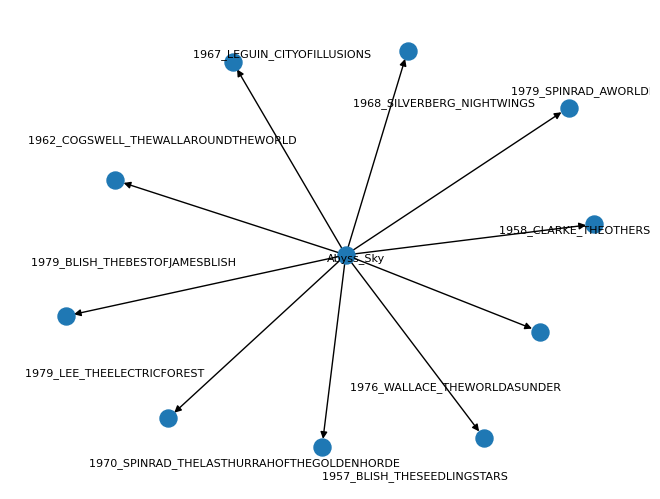

In [242]:
#Make network graph for single topic
import networkx as nx

G = nx.DiGraph()

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(test, 'Topic', 'Title', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, node_size=150, arrows=True)

# labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")


ax.margins(0.01)
plt.show()

## Visualizations

In [243]:
#Visualize distance between topics
topic_model.visualize_topics()

In [244]:
#Get probability that topics will appear in a specific document
topic_model.visualize_distribution(probs[0], min_probability=0.015)

In [245]:
#Vizualize hierarchical structure of topics
topic_model.visualize_hierarchy(top_n_topics=60)

In [246]:
#Visualize top terms in selected topics
topic_model.visualize_barchart(top_n_topics=10)

In [247]:
#Create matrix to indicate similarity between topics
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [248]:
#Visualize the decline of c-TF-IDF score when adding words to the topic representation. 
#It allows you, using the elbow method, the select the best number of words in a topic.
topic_model.visualize_term_rank()

## Search Topics for Terms

In [249]:
#Search for topics that are similar to an input search_term
similar_topics, similarity = topic_model.find_topics("space", top_n=5); similar_topics

[74, 11, 21, 22, 87]

In [250]:
#Look at other terms in that one of the similar topics
topic_model.get_topic(18)

[('dilke', 0.07552689191869633),
 ('olsen', 0.03414104049769678),
 ('henry', 0.02927675768433934),
 ('dilkes', 0.01708311350955558),
 ('batzar', 0.01266860342401874),
 ('bill', 0.012545384701280134),
 ('lay', 0.011906432012689191),
 ('crossbow', 0.011074826281217628),
 ('box', 0.010906838685220861),
 ('platform', 0.010827032278576789),
 ('charlie', 0.009963963304441135),
 ('head', 0.009793055246842208),
 ('volsk', 0.009654143949356186),
 ('shed', 0.00815364294001381),
 ('ants', 0.008045084744891103),
 ('side', 0.008037817415163403),
 ('towards', 0.008028628422780952),
 ('wallis', 0.007874343109049104),
 ('hand', 0.007847151076171134),
 ('floor', 0.007844085571967294)]

In [251]:
#Get all the texts which have most similar topic as top topic
top_topics_df.loc[top_topics_df['Top_Topic'] == 18]

NameError: name 'top_topics_df' is not defined

## Update the BERTopic Model

Two common ways to update the topic model are based on ngram counts (default is single words, but you can also get bigrams, trigrams, etc) and by setting the number of topics)

In [ ]:
#Update topics based on ngram counts
topic_model.update_topics(text, n_gram_range=(1, 2))

In [ ]:
#Look at the topics again
topic_model.get_topic_info(); freq.head(10)

In [ ]:
topic_model.get_topic(4)   # We select topic that we viewed before

In [ ]:
#Reduce number of topics
topic_model.reduce_topics(text, nr_topics=20)

In [ ]:
topic_model.get_topic_info(); freq.head(10)

## Additional Sources
Word Embeddings: https://www.shanelynn.ie/get-busy-with-word-embeddings-introduction/

BERTopic Intro: https://towardsdatascience.com/meet-bertopic-berts-cousin-for-advanced-topic-modeling-ea5bf0b7faa3

MOre about BERTopic: 
https://towardsdatascience.com/dynamic-topic-modeling-with-bertopic-e5857e29f872